In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Prediction and Estimation ##

One way to think about the SD is in terms of errors in prediction. Suppose I am going to generate a value of the random variable $X$, and I ask you to predict the value I am going to get. What should you use as your predictor?

A natural choice is $\mu_X$, the expectation of $X$. But you could choose any number $c$. The error that you will make is $X - c$. About how big is that? For most reasonable choices of $c$, the error will sometimes be positive and sometimes negative. To find the rough size of this error, we will avoid cancellation as before, and start by calculating the *mean squared error* of the predictor $c$:

$$
MSE(c) ~ = ~ E[(X-c)^2]
$$

Notice that by definition, the variance of $X$ is the mean squared error of using $\mu_X$ as the predictor.

$$
MSE(\mu_X) ~ = ~ E[(X-\mu_X)^2] ~ = ~ \sigma_X^2
$$

In [2]:
# VIDEO: Least Squares Constant Predictor
from IPython.display import YouTubeVideo

YouTubeVideo('hnm1Ht5DiWk')

We will now show that $\mu_X$ is the *least squares* constant predictor, that is, it has the smallest mean squared error among all constant predictors. Since we have guessed that $\mu_X$ is the best choice, we will organize the algebra around that value. 

$$
\begin{align*}
MSE(c) ~ = ~ E\big{[}(X - c)^2\big{]} &= E\big{[} \big{(} (X - \mu_X) + (\mu_X - c) \big{)}^2 \big{]} \\
&= E\big{[} (X - \mu_X)^2 \big{]} +2(\mu_X - c)E\big{[} (X-\mu_X) \big{]} + (\mu_X -c)^2 \\
&= \sigma_X^2 + 0 + (\mu_X -c)^2 \\
&\ge \sigma_X^2 \\
&= MSE(\mu_X)
\end{align*}
$$

with equality if and only if $c = \mu_X$.

### The Mean as a Least Squares Predictor ###
What we have shown is the predictor $\mu_X$ has the smallest mean squared error among all choices $c$. That smallest mean squared error is the variance of $X$, and hence the smallest root mean squared error is the SD $\sigma_X$.

This is why a common approach to prediction is, "My guess is the mean, and I'll be off by about an SD." 

```{admonition} Quick Check
Your friend has a random dollar amount $X$ in their wallet. Suppose you know that $E(X) = 16$ dollars and $SD(X) = 3$ dollars. In all your answers below, please include units of measurement.

(a) What is the least squares constant predictor of $X$?

(b) What is the mean squared error of this predictor?

(c) What is the root mean squared error of this predictor?

```

```{admonition} Answer
:class: dropdown
(a) $16$ dollars

(b) $9$ squared dollars

(c) $3$ dollars

```

### German Tanks, Revisited ###

Recall the [German tanks](http://prob140.org/textbook/content/Chapter_08/04_Additivity.html#first-unbiased-estimator-of-a-maximum-possible-value) problem in which we have a sample $X_1, X_2, \ldots , X_n$ drawn at random without replacement from $1, 2, \ldots , N$ for some fixed $N$, and we are trying to estimate $N$. 

We came up with two unbiased estimators of $N$:

- An estimator based on the sample mean: $T_1 = 2\bar{X}_n - 1$ where $\bar{X}_n$ is the sample average $\frac{1}{n}\sum_{i=1}^n X_i$
- An estimator based on the sample maximum: $T_2 = M\cdot\frac{n+1}{n} - 1$ where $M = \max(X_1, X_2, \ldots, X_n)$.

Here are simulated distributions of $T_1$ and $T_2$ in the case $N = 300$ and $n = 30$, based on 5000 repetitions.

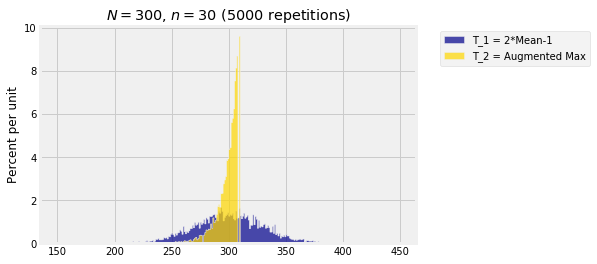

In [3]:
def simulate_T1_T2(N, n):
    """Returns one pair of simulated values of T_1 and T_2
    based on the same simple random sample"""
    tanks = np.arange(1, N+1)
    sample = np.random.choice(tanks, size=n, replace=False)
    t1 = 2*np.mean(sample) - 1
    t2 = max(sample)*(n+1)/n - 1
    return [t1, t2]

def compare_T1_T2(N, n, repetitions):
    """Returns a table of simulated values of T_1 and T_2, 
    with the number of rows = repetitions
    and each row containing the two estimates based on the same simple random sample"""
    tbl = Table(['T_1 = 2*Mean-1', 'T_2 = Augmented Max'])
    for i in range(repetitions):
        tbl.append(simulate_T1_T2(N, n))
    return tbl

N = 300
n = 30
repetitions = 5000
comparison = compare_T1_T2(N, n, 5000)   
comparison.hist(bins=np.arange(N/2, 3*N/2))
plt.title('$N =$'+str(N)+', $n =$'+str(n)+' ('+str(repetitions)+' repetitions)');

We know that both estimators are unbiased: $E(T_1) = N = E(T_2)$. But is clear from the simulation that $SD(T_1) > SD(T_2)$ and hence $T_2$ is a better estimator than $T_1$.

The empirical values of the two means and standard deviations based on this simulation are calculated below.

In [4]:
t1 = comparison.column(0)
np.mean(t1), np.std(t1)

(299.9358, 29.927738514331853)

In [5]:
t2 = comparison.column(1)
np.mean(t2), np.std(t2)

(299.67644, 9.58574049963799)

These standard deviations are calculated based on empirical data given a specified value of the parameter $N = 300$ and a specified sample size $n = 30$. In the next chapter we will develop properties of the SD that will allow us to obtain algebraic expressions for $SD(T_1)$ and $SD(T_2)$ for all $N$ and $n$.